<h1><center><b> Acquired Intelligence & Adaptive Behaviour </b></center></h1>
<h2><center><i>An optimisation algorithm (Lab Sheet 02) </i></center></h2>


**Goal**: In this notebook we will start by implementing a population of hill climbers to solve a resource allocation (or knapsack) problem. We will then contruct the full microbial GA presented in lectures. This will involve designing a suitable fitness function and selection method. You will investigate the effects of hyperparameters such as mutation rate. 



# Knapsack problem

The knapsack (KP) problem is an example of a combinatorial optimization problem, refer to the [wiki](https://en.wikipedia.org/wiki/Knapsack_problem) for a broader overview. 

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Knapsack.svg/250px-Knapsack.svg.png" width="200"></center>

It is concerned with a knapsack that has positive integer volume (or capacity) $V$. For instance, the knapsack may be able to store 20 cubic metres in Volume (V). There are $N$ distinct items that may potentially be placed in the knapsack. Item $i$ has a positive integer
volume $Vi$ (e.g this object is 8 cubic inches) and positive integer benefit $Bi$ (e.g how benefical is it to have this object in the knapsack). In the most basic form of the problem we will consider there are only one of each item available (0-1 KP).

The goal is to maximize benefit:

$$
\sum_i^N B_i
$$

Subject to the constraint that:

$$
\big ( \sum_i^N V_i \big) \leq  V
$$

For example suppose we have a knapsack that has a capacity of 20 cubic metres ($V$) and $N=10$ items of different sizes and different benefits. We want to include in the knapsack only these
items that will have the greatest total benefit within the constraint of the knapsack’s capacity.

```
item        a b c d e f g  h i j
Benefit (B) 5 6 1 9 2 8 4  3 7 10
Volume (V)  3 2 4 5 8 9 10 1 6 7
```


# Hill climbing agent
**Background**: Hill climbers may be used to find solutions to a wide variety of problems. Each hill climbing individual increases its fitness through trial and error (one trial here can be though of as one generation):

1. Create a random individual
2. Change (mutate) the individual 
3. Measure how good this individual is for some task (fitness)
4. If it's worse than before, keep the original individual. Otherwise, keep the changed individual.
5. Goto 2


Our  algorithms will be composed of four components:

1. **Genotype**: a list of numbers which encode information about task solutions, representing an indvidual
2. **Genotype to phenotype mapping**: How should the genotype be interpreted as encoding a solution to our problem? This is analogous to the development of an organism from birth to adulthood. However, for this current problem, this should turn out to be quite trivial.
3. **Fitness function**: We need a way to evaluate how good each phenotype is as a potential solution to the card-sorting problem. How might this be implemented? 
4. A method for **mutation**. Is it necessary to allow random changes in the offspring produced by reproduction in order to maintain variability. 

> **Task**: Code a single hill climbing individuals to solve the above task. Implement your
algorithm in full and run it for at least 100 generations (i.e. repetitions of the algorithm).
Recording the fitness at each generation. Plot the fitness versus the generation number.
Have you found a solution? Try changing the mutation rate and observe the effects.

**Tips**:
- Code an individual as a single vector, using binary digits (0 or 1) for each gene. Each digit represents whether the corresponding object is being included in the knapsack. Below is an example of how to generate this in python:



* There are several ways in which you can encode the problem itself (the volumes and benefit of each object). It may be useful to store these values as an array:

* The fitness function should return a _single number_ which quantifies how close to the ideal solution a phenotype is. Below is a rough example of what this function should look like:

In [3]:
def fitness_function(genotype, benefits, volumes, max_volume):
  fitness = 0
  total_volume = 0
  # Go through all genes
  for i in range(num_items):
    # Check gene to see if item is in knapsack
    if(genotype[i] == 1):
    # Add benefit and volume to variable respectively
      fitness += benefits[i]
      total_volume += volumes[i]   
  # If total volume of items in knapsack exceeds limit
  if(total_volume > max_volume):
    fitness = 0
  return fitness

* Implement your mutation by selecting a random gene (e.g by picking a random number between 1 and 10) and then flipping the number (0 to 1 or 1 to 0). 

* Overwrite the current individual if the new indvidual is better.

**You will need to integrate these features into a loop which performs the genetic algorithm detailed above**.

In [4]:
# Mutate function deals with mutating a gene
def mutate(genotype, index, mutation_rate):
  # Makes a copy of genotype
  child = genotype.copy()
  if(index*10 <= mutation_rate):
    if(child[index] == 0):
      child[index] = 1
    else:
      child[index] = 0
    # Check fitness of new genotype compared to old genotype
  if(fitness_function(child, benefits, volumes, max_volume) > fitness_function(genotype, benefits, volumes, max_volume)):       
    # If new genotype is better, set to be main genotype
    genotype = child
  return genotype

Initial Genotype: 	 [0 0 1 1 1 0 1 1 1 0]
Benefits: 	 [ 5  6  1  9  2  8  4  3  7 10]
Volumes: 	 [ 3  2  4  5  8  9 10  1  6  7]
Improved Genotype: 	 [0 0 1 1 1 0 1 1 1 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


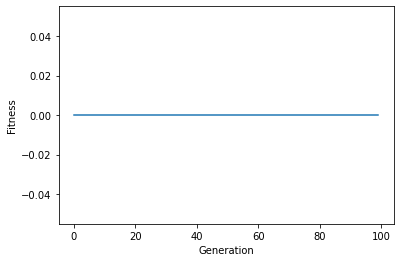

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt

mutation_rate = 20
# number of items in our problem
num_items = 10

# hill climbing genotype
genotype = np.random.choice([0, 1], (num_items))

print("Initial Genotype: \t", genotype)

max_volume = 20
benefits = np.array([5, 6, 1, 9, 2, 8, 4, 3, 7, 10])
volumes = np.array([3, 2, 4, 5, 8, 9, 10, 1, 6, 7])
print("Benefits: \t",benefits)
print("Volumes: \t",volumes)

values = []
# Runs each generation
# Runs 100 amount of generations 
for i in range(100):
  # Generate a random number in the range of number of children
  randInt = random.randrange(num_items)
  # mutates
  genotype = mutate(genotype, randInt, mutation_rate)
  # adds fitness value to array
  values.append(fitness_function(genotype, benefits, volumes, max_volume))
# Returns all fitness values
print("Improved Genotype: \t",genotype)
print(values)
plt.plot(values)
plt.ylabel("Fitness")
plt.xlabel("Generation")
plt.savefig('singleHillClimber.png')
plt.show()

> **Task**: Code a population of hill climbers that attempt to solve the task in parallel. Plot the fitness of the hillclimbers versus the number of generations. How many individuals are successful for each run. Is a population of hill climbers less or more computational expensive? What happens when you make the problem bigger or change the problem.


**Tips**:
- For a population of hill climbers code many individuals in a matrix and keep fitness values in vector:

In [6]:
import numpy as np 

num_genes = 10
num_individuals = 5
num_items = 10
mutation_rate = 10

genotypes = np.random.choice([0, 1], (num_individuals, num_items))
fitness = np.zeros(num_individuals)

print(f"All genotypes: \n{genotypes}")
print(f"Genotype 3: {genotypes[3, :]}")
print(f"Genotype 3 gene 7: {genotypes[3, 7]}")

def multi_climbers(num_individuals, num_items, genotypes, fitness):
  value_multi = []
  # Run "num_individuals" different hillclimbers
  for i in range(num_individuals):
    # Generate a random number in the range of number of children
    randInt = random.randrange(num_items)
    # mutates
    genotype = mutate(genotype, randInt, mutation_rate)
    fitness[i] = (fitness_function(genotypes[i], benefits, volumes, max_volume))

  return value_multi


  

All genotypes: 
[[0 0 1 1 1 0 0 1 1 1]
 [1 0 1 0 1 0 0 0 0 1]
 [1 1 0 0 1 1 1 0 0 0]
 [0 0 1 0 1 1 1 0 1 1]
 [1 1 1 1 0 1 0 1 0 0]]
Genotype 3: [0 0 1 0 1 1 1 0 1 1]
Genotype 3 gene 7: 0


> **Task**: Demonstrate that a local maxima exist. Can you find suboptimal solution that get worse with every mutation but is not the globally optimal solution. It can be helpful to plot fitness over time. 

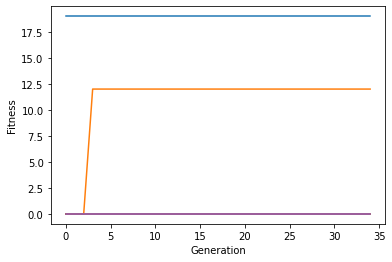

19.0
5.994285714285715
7.912014114429952


In [7]:
mutation_rate = 90
num_genes = 35
num_individuals = 5 
num_items = 10

genotypes = np.random.choice([0, 1], (num_individuals, num_items))
fitness = np.zeros(num_individuals)

values_multi = np.zeros((num_individuals, num_genes))
for i in range(num_genes): 
  # Run "num_individuals" different hillclimbers
  for j in range(num_individuals):
    # Generate a random number in the range of number of children
    randInt = random.randrange(num_items)
    # mutates
    genotypes[j] = mutate(genotypes[j], randInt, mutation_rate)
    fitness[j] = (fitness_function(genotypes[j], benefits, volumes, max_volume))
    values_multi[j][i] = fitness[j]

for i in range(num_individuals):
  plt.plot(values_multi[i][:])
plt.ylabel("Fitness")
plt.xlabel("Generation")
plt.savefig('multipleHillClimber.png')
plt.show()
print(np.amax(values_multi))
print(np.average(values_multi))
print(np.std(values_multi))
#print(values_multi)

# Microbial GA

We will implement a steady GA with tournament selection for the knapsack problem. See lecture notes for a full description. You will need:

1. **Population**: a collection of $N$ genotypes. See previous tips for information on how to encode this. 
2. **Genotype - phenotype** mapping (same as before)
3. **A fitness function** same as before, store in vector length $N$.
4. A **tournament selection** method - how to pick some subset of individuals and select some winners
5. A **mutation operator** similar to before. Note here the mutation function should only be changing the genotype and not checking if the fitness is better or worse.

The Pseudocode is as follows:

1. Initialise random pop $P$
2. Pick 2 individuals at random & evaluate them (in terms of fitness) finding a winner (W) and loser (L) 
3. Replace L with W
4. Add a mutation to the replacement of L (which is a copy of W)
5. Goto 2

> **Task** Implement the above Pseudocode. Plot the fitness of the best individual versus the number of generations. The number of generations and number of tournaments are one and the same in this case. 
How well does it perform? Run several runs for fixed number of generations (tournaments) and plot a bar chart of the average fitness in different conditons.Does it do better than the hillclimber from last week? Whats is the effect of the mutation rate? 

 

In [17]:
class MicrobialGA:
    def __init__(self, mutation, size):
        self.max_volume = 20
        self.benefits = np.array([5, 6, 1, 9, 2, 8, 4, 3, 7, 10])
        self.volumes = np.array([3, 2, 4, 5, 8, 9, 10, 1, 6, 7])
        self.mutation = mutation
        self.size = size
        # Create and generate a population of random individuals
        self.population = []
        for i in range(self.size):
            self.population += [[random.randrange(2) for i in range(10)]]
            
    # Mutatation function
    def mutate(self, position):
        # Makes a copy of individuals genotype
        child = self.population[position].copy()
        # Generate a random number between 0-9
        randInt = random.randrange(10)
        # If number is less than mutation rate
        # This allows to control the chance of mutation
        # If mutation is set to 2, then 20% chance
        if(randInt < self.mutation):
            # Flip selected gene
            if(child[randInt] == 0):
                child[randInt] = 1
            else:
                child[randInt] = 0
            # Check fitness of new genotype compared to individuals genotype
            if(self.fitness(child) > self.fitness(self.population[position])):
                # If new genotype is better, set to be this individuals genotype
                self.population[position] = child
    
    # Fitness function
    def fitness(self, genes):
        total_benefit = 0
        total_volume = 0
        # Go through all 10 genes
        for i in range(10):
            # Check gene to see if item is in knapsack
            if(genes[i] == 1):
                # Add benefit and volume to variable respectively
                total_benefit += self.benefits[i]
                total_volume += self.volumes[i]
        
        # If total volume of items in knapsack doesn't exceeds limit
        if(total_volume <= self.max_volume):
            # return total benefit
            return total_benefit
        # If capacity is exceeded, return 0
        else:
            return 0

    # Compare function deals with comparing solutions and winner/loser process
    def compare(self):
        # Pick 2 random individuals
        fighter1 = random.randrange(self.size)
        fighter2 = random.randrange(self.size)
               
        # Compares fitness of individuals x1 and x2
        if(self.fitness(self.population[fighter1]) > self.fitness(self.population[fighter2])):
            # Loser takes genes from Winner
            for i in range(10):
              self.population[fighter2][i] = self.population[fighter1][i]
            # Mutate loser after taking the genes
            self.mutate(fighter2)
        else:
            # Loser takes genes from Winner
            for i in range(10):
              self.population[fighter1][i] = self.population[fighter2][i]
            # Mutate loser after taking the genes
            self.mutate(fighter1)
    
    # Function to run comparison process
    def run(self, loops):
        values = []
        for i in range(loops):
            # Compares two individuals, declares winner and loser
            # Loser takes some genes and mutates
            self.compare()
            temp = 0
            for i in range(self.size):
                # Adds all fitness of all individuals together
                temp += (self.fitness(self.population[i]))
            # Gets the average of all fitnesses
            temp = temp / self.size
            # Adds average fitness of population to values
            values.append(temp)
        # Returns average fitness of population in each generation
        return values

    def run2(self, loops):
        values_multi = []
        for i in range(loops):
          # Compares two individuals, declares winner and loser
          # Loser takes some genes and mutates
          self.compare()
          for j in range(self.size):
              value = []
              # Adds all fitness of all individuals together
              value.append(self.fitness(self.population[j]))
        # Returns average fitness of population in each generation
          values_multi.append(max(value)) 
        return values_multi

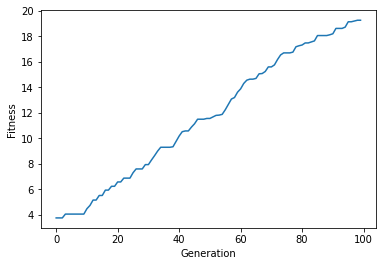

In [31]:
num_gens = 100
## MicrobialGA(mutation rate, crossover rate, size, k)
# Muation rate of 50%, population size of 50
y = MicrobialGA(0.5, 50)
values_multi = y.run(num_gens)

plt.plot(values_multi)
plt.ylabel("Fitness")
plt.xlabel("Generation")
plt.savefig('MicrobialGA.png')
plt.show()


# Spatial GA
We will now implement a spatial GA with demes, see lectures. You will to put the population of N individuals on 1D array.

Pseudocode is as follows:
1. Initialise random pop $P$ 
2. Associate each individual with a position $x$, i.e, let the position of the genotype in the population array indicate the position on a 1D grid. 
3. Pick one individual at random, i.e. genotype $G_1$ at position $x_1$ 
4. Pick a second individual $G_2$ in the local neighbourhood of the first, i.e., pick a competitor from the local neighbourhood in the range $x_1+1$ to $x_1 + k$.
5. Compare $G_1$ and $G_2$ finding a winner (W) and loser (L) 
6. Copy W over to L and add a mutation, insert it back to the population.
7. Until success or give up, goto 3 


> **Task** Implement the spatial GA. How do this algorithm compare to the first. Does it evolve quicker? Run several runs for fixed number of generations (tournaments) and plot a bar chart of the average fitness in different conditons. Does it get stuck in local minima more or less often? Why?

**Tips:** You can use the same structure as before for the spatial genes:


In [ ]:
import numpy as np 

num_genes = 10
num_individuals = 5 # you probably want more than 5, this is just for plotting
k = 3 # define local neighbourhood

genotypes = np.random.choice([0, 1], (num_individuals, num_items))

# lets say I want to sample a neighbour for indivudal 3
local_neighbour_idx = np.random.randint(3+1, 3 + k) # pick random neighbour 
local_neighbour_gene = genotypes[local_neighbour_idx, :]
print(local_neighbour_gene)

[0 0 1 1 1 0 0 0 0 0]


In [35]:
class SpatialGA:
    def __init__(self, mutation, size, k):
        self.max_volume = 20
        self.benefits = np.array([5, 6, 1, 9, 2, 8, 4, 3, 7, 10])
        self.volumes = np.array([3, 2, 4, 5, 8, 9, 10, 1, 6, 7])
        self.mutation = mutation
        self.size = size
        self.k = k
        # Create and generate a population of random individuals
        self.population = []
        for i in range(self.size):
            self.population += [[random.randrange(2) for i in range(10)]]
            
    def mutate(self, position):
        child = self.population[position].copy()
        # Generate a random number between 0-9
        a = random.randrange(10)
        # If number is less than mutation rate
        # This allows me to control the chance of mutation
        # If mutation is set to 2, then 20% chance
        if(a < self.mutation):
            # Flip selected gene
            if(child[a] == 0):
                child[a] = 1
            else:
                child[a] = 0
            # Check fitness of new genotype compared to individuals genotype
            if(self.fitness(child) > self.fitness(self.population[position])):
                # If new genotype is better, set to be this individuals genotype
                self.population[position] = child
    
    def fitness(self, genes):
        total_benefit = 0
        total_volume = 0
        # Go through all 10 genes
        for i in range(10):
            # Check gene to see if item is in knapsack
            if(genes[i] == 1):
                # Add benefit and volume to variable respectively
                total_benefit += self.benefits[i]
                total_volume += self.volumes[i]
        
        # If total volume of items in knapsack doesn't exceeds limit
        if(total_volume <= self.max_volume):
            # return total benefit
            return total_benefit
        # If capacity is exceeded, return 0
        else:
            return 0

    def compare(self):
        # Pick 2 random individuals
        fighter1 = random.randrange(self.size)
        fighter2 = random.randrange(fighter1 + 1, fighter1 + self.k)
        if(fighter2 > self.size - 1):
          fighter2 = self.size - 1           
        # Compares fitness of individuals x1 and x2
        if(self.fitness(self.population[fighter1]) > self.fitness(self.population[fighter2])):
            # Loser takes genes from Winner
            for i in range(10):
              self.population[fighter2][i] = self.population[fighter1][i]
            # Mutate loser after taking the genes
            self.mutate(fighter2)
        else:
            # Loser takes genes from Winner
            for i in range(10):
              self.population[fighter1][i] = self.population[fighter2][i]
            # Mutate loser after taking the genes
            self.mutate(fighter1)

    def run(self, loops):
        values = []
        for i in range(loops):
            # Compares two individuals, declares winner and loser
            # Loser takes some genes and mutates
            self.compare()
            temp = 0
            for i in range(self.size):
                # Adds all fitness of all individuals together
                temp += (self.fitness(self.population[i]))
            # Gets the average of all fitnesses
            temp = temp / self.size
            # Adds average fitness of population to values
            values.append(temp)
        # Returns average fitness of population in each generation
        return values

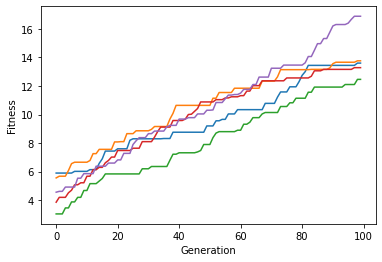

In [32]:
num_populations = 5
for i in range(num_populations):
    ## MicrobialGA(mutation rate, crossover rate, size, k)
    # Muation rate of 50%, crossover rate of 50%, population size of 50
    y = SpatialGA(0.5, 50, 2)
    # Run 100 generations
    values = y.run(100)
    plt.plot(values)
plt.ylabel("Fitness")
plt.xlabel("Generation")
plt.savefig('SpatialGA.png')
plt.show()

# Full microbial GA
We will now implement a spatial GA. You will to put the population of N individuals on 1D array.

Pseudocode is as follows: 
1. Initialise random pop $P$ 
2. Associate each individual with a position $x$, i.e, let the position of the genotype in the population matrix indicate the position on a 1D grid. 
3. Pick one individual at random, i.e. genotype $G_1$ at position $x_1$ 
4. Pick a second individual $G_2$ in the local neighbourhood of the first, i.e., pick a competitor from the local neighbourhood in the range $x_1+1$ to $x_1 + k$ (start with $k=2$) 
5. Compare $G_1$ and $G_2$ finding a winner (W) and loser (L) 
6. Copy each gene of the winner W to the L with crossover probability (Pcrossover, say 0.5 to start) 
7. Add a mutation to the new L and insert it back to the population.
8. Until success or give up, goto 3 



> **Task**  Plot the fitness of the best individual versus the number of generations. Run several runs for fixed number of generations (tournaments) and plot a bar chart of the average fitness in different conditons. How does this algorithm compare to the first two? Does it evolve quicker? Does it get stuck in local minima more or less often. What is the effect of crossover on the speed of evolution?


In [34]:
class FullMicrobialGA:
    def __init__(self, mutation, crossover, size, k):
        # Declare the 10 items with names, benefits and volume
        self.max_volume = 20
        self.benefits = np.array([5, 6, 1, 9, 2, 8, 4, 3, 7, 10])
        self.volumes = np.array([3, 2, 4, 5, 8, 9, 10, 1, 6, 7])
        self.mutation = mutation
        # Crossover rate is multipled by 100 to be in correct format
        self.crossover = 100 * crossover
        self.size = size
        self.k = k
        # Create and generate a population of random individuals
        self.population = []
        for i in range(self.size):
            self.population += [[random.randrange(2) for i in range(10)]]
            

    def mutate(self, position):
        child = self.population[position].copy()
        a = random.randrange(10)
        # If mutation is set to 2, then 20% chance
        if(a < self.mutation):
            # Flip selected gene
            if(child[a] == 0):
                child[a] = 1
            else:
                child[a] = 0
            # Check fitness of new genotype compared to individuals genotype
            if(self.fitness(child) > self.fitness(self.population[position])):
                # If new genotype is better, set to be this individuals genotype
                self.population[position] = child

    def fitness(self, genes):
        total_benefit = 0
        total_volume = 0
        # Go through all 10 genes
        for i in range(10):
            # Check gene to see if item is in knapsack
            if(genes[i] == 1):
                # Add benefit and volume to variable respectively
                total_benefit += self.benefits[i]
                total_volume += self.volumes[i]
        
        # If total volume of items in knapsack doesn't exceeds limit
        if(total_volume <= self.max_volume):
            # return total benefit
            return total_benefit
        # If capacity is exceeded, return 0
        else:
            return 0

    def compare(self):
        # Pick 2 random individuals
        fighter1 = random.randrange(self.size)
        fighter2 = random.randrange(fighter1 + 1, fighter1 + self.k)
        if(fighter2 > self.size - 1):
          fighter2 = self.size - 1    
        # Compares fitness of individuals x1 and x2
        if(self.fitness(self.population[fighter1]) > self.fitness(self.population[fighter2])):
            # Loser takes genes from Winner
            for i in range(10):
                # Each gene has a chance to be taken depending on crossover rate
                temp = random.randrange(100)
                if(temp < self.crossover):
                    # If crossover rate test passed, takes gene from winner
                    self.population[fighter2][i] = self.population[fighter1][i]
            # Mutate loser after taking the genes
            self.mutate(fighter2)
        else:
            # Loser takes genes from Winner
            for i in range(10):
                # Each gene has a chance to be taken depending on crossover rate
                # If crossover = 50 then 50% chance of taking a gene each time
                temp = random.randrange(100)
                if(temp < self.crossover):
                    # If crossover rate test passed, takes gene from winner
                    self.population[fighter1][i] = self.population[fighter2][i]
            # Mutate loser after taking the genes
            self.mutate(fighter1)
    
    def run(self, loops):
        values = []
        for i in range(loops):
            # Compares two individuals, declares winner and loser
            # Loser takes some genes and mutates
            self.compare()
            temp = 0
            for i in range(self.size):
                # Adds all fitness of all individuals together
                temp += (self.fitness(self.population[i]))
            # Gets the average of all fitnesses
            temp = temp / self.size
            # Adds average fitness of population to values
            values.append(temp)
        # Returns average fitness of population in each generation
        return values


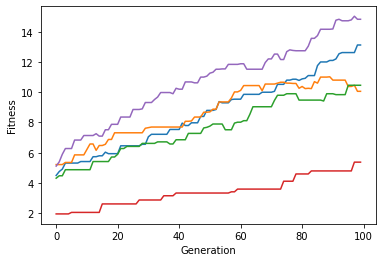

2.5869105202924976


In [49]:
num_individuals = 5
num_gens = 100
mutation_prob = 0.5
cross_prob = 0.5
pop_size = 50
k = 2
for i in range(num_individuals):
    ## FullMicrobialGA(mutation rate, crossover rate, size, k)
    # Mutation rate of 50%, crossover rate of 50%, population size of 50
    y = FullMicrobialGA(mutation_prob, cross_prob, pop_size, k)
    # Run 100 generations
    values = y.run(num_gens)
    plt.plot(values)

plt.ylabel("Fitness")
plt.xlabel("Generation")
plt.savefig('FullMicrobialGA.png')
plt.show()
print(np.std(values))

